# The Following notebook will provide you with the six phase of the CRISP-DM#

To get started, let's read in the necessary libraries we will need to wrangle our data: pandas and numpy. If we decided to build some basic plots, matplotlib might prove useful as well.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1. Business Understanding
      
     Coronavirus disease (COVID-19) is an infectious illness caused by a newly discovered coronavirus.
     
     I'm going to reflect on the three questions below :
     
         1. What Are The Top 10 Countries In Terms Of Confirmed Cases And Fatalities And How They Compare With Each Other?
         2. What Are The Top States In Terms Of Confirmed Cases In China And US ?
         3. Which Country Is Able To Control The Spread Of COVID-19 ?
         
 # 2. Data Understanding# 
 
      Reading the covid-19 Dataset
      

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head() # Displaying First 5 Records

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [4]:
df.shape[0]

29422

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29422 entries, 0 to 29421
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              29422 non-null  int64  
 1   Province_State  12502 non-null  object 
 2   Country_Region  29422 non-null  object 
 3   Date            29422 non-null  object 
 4   ConfirmedCases  29422 non-null  float64
 5   Fatalities      29422 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.3+ MB


In [6]:
df.columns

Index(['Id', 'Province_State', 'Country_Region', 'Date', 'ConfirmedCases',
       'Fatalities'],
      dtype='object')

In [7]:
df.isnull().sum()

Id                    0
Province_State    16920
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

# 3. Prepare Data #

    There are some necessary stpes to apply before continue exploring the dataset:

        1. Drop unused columns
        2. Convert string values to number
        3. Handle missing values, drop them if necessary
        
      

# Now to take a peek at our first topic of concern What Are The Top 10 Countries In Terms Of Confirmed Cases And Fatalities And How They Compare With Each Other?#

In [8]:
top = df.fillna('NA').groupby(['Country_Region','Province_State','Date'])['ConfirmedCases'].sum() \
                          .groupby(['Country_Region','Province_State']).max().sort_values() \
                          .groupby(['Country_Region']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(top).head(10)

In [9]:
top_death = df.fillna('NA').groupby(['Country_Region','Province_State','Date'])['Fatalities'].sum() \
                          .groupby(['Country_Region','Province_State']).max().sort_values() \
                          .groupby(['Country_Region']).sum().sort_values(ascending = False)

top10_death = pd.DataFrame(top_death).head(10)

In [10]:
confirmed_top10 = top10['ConfirmedCases'].sum()

In [11]:
death_top10 = top10_death['Fatalities'].sum()

Now let's figure out what proportion of overall cases are coming from the top 10 countries and the names of those nations.

In [12]:
confirmed_top10 /  df.groupby('Date',as_index = False).sum().drop(['Id','Date'],axis = 1).tail(1)['ConfirmedCases'].values

array([0.75567428])

In [13]:
countries = top10.index.values
print(countries)

['US' 'Spain' 'Italy' 'France' 'Germany' 'United Kingdom' 'Turkey' 'Iran'
 'China' 'Russia']


We can see that more than 75% of incidents are in the top 10 countries. So let's look at what proportion of the casualties come from the top 10 countries from the fates and names of those nations.

In [14]:
death_top10 / df.groupby('Date',as_index = False).sum().drop(['Id','Date'],axis = 1).tail(1)['Fatalities'].values

array([0.8590805])

In [15]:
countries = top10_death.index.values
print(countries)

['US' 'Italy' 'Spain' 'France' 'United Kingdom' 'Belgium' 'Germany' 'Iran'
 'China' 'Netherlands']


It's much more shocking that almost 85% of the deaths came from the top 10 countries in the planet.

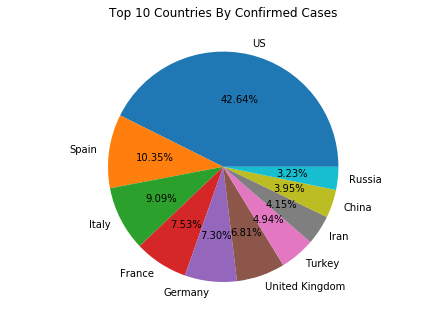

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
plt.title('Top 10 Countries By Confirmed Cases')
country = top10.index.values
confirmed = top10['ConfirmedCases']
ax.pie(confirmed, labels = country,autopct='%1.2f%%')
plt.show()

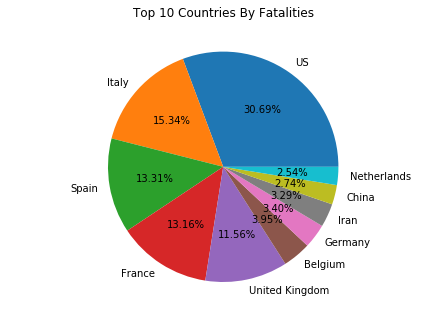

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
plt.title('Top 10 Countries By Fatalities')
country = top10_death.index.values
confirmed = top10_death['Fatalities']
ax.pie(confirmed, labels = country,autopct='%1.2f%%')
plt.show()

By Reading The Above Plots We Can Conclude That US Has Highest Count In Terms Of Confirmed Cases Whereas Italy Has Highest Count In Terms Of Fatalities

Now Let's Analyze Data Of Spain,India,Iran And US.

In [18]:
# Country Wise Data
df_india = df[df['Country_Region'] == 'India'].drop(['Id'],axis = 1)
df_china = df[df['Country_Region'] == 'China'].drop(['Id'],axis = 1)
df_us = df[df['Country_Region'] == 'US'].drop(['Id'],axis = 1)
df_italy = df[df['Country_Region'] == 'Italy'].drop(['Id'],axis = 1)

In [19]:
# Latest Country Wise Numbers As On 2020-04-09
latest_us = df_us[df_us['Date'] == '2020-04-09']
latest_china = df_china[df_china['Date'] == '2020-04-09']
latest_india = df_india[df_india['Date'] == '2020-04-09']
latest_italy = df_italy[df_italy['Date'] == '2020-04-09']

In [20]:
print('US Total Confirmed Cases : ' + str(latest_us['ConfirmedCases'].sum()))
print('China Total Confirmed Cases : ' + str(latest_china['ConfirmedCases'].sum()))
print('India Total Confirmed Cases : ' + str(latest_india['ConfirmedCases'].sum()))
print('Italy Total Confirmed Cases : ' + str(latest_italy['ConfirmedCases'].sum()))

US Total Confirmed Cases : 461274.0
China Total Confirmed Cases : 82883.0
India Total Confirmed Cases : 6725.0
Italy Total Confirmed Cases : 143626.0



# Now to look at our second question of interest: What Are The Top States In Terms Of Confirmed Cases In China And US ?

In [21]:
def bar_plot(country,df):
    labels = df['Province_State'].values
    sizes = df['ConfirmedCases'].values
    plt.figure(figsize=(10,10))
    plt.title(country + ' Statewise Confirmed Cases As On 09/04/2020')
    plt.barh(labels,sizes, align='center')
    plt.xlabel('Total Cases')
    plt.ylabel('States')
    plt.show()

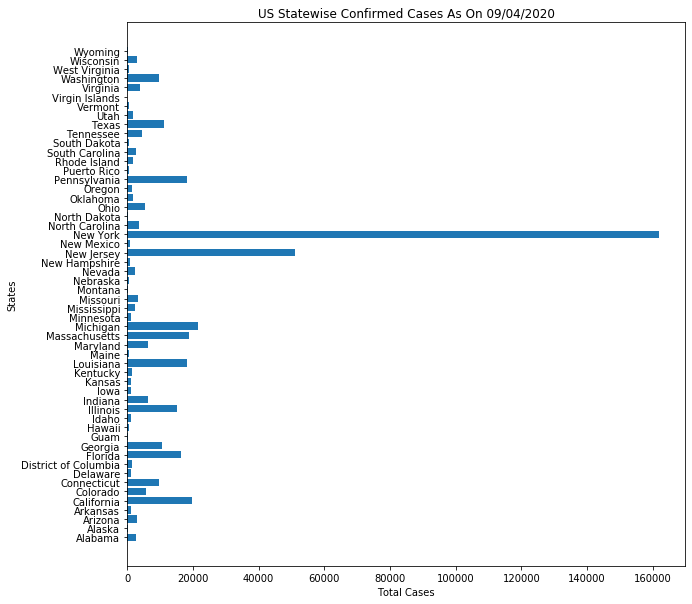

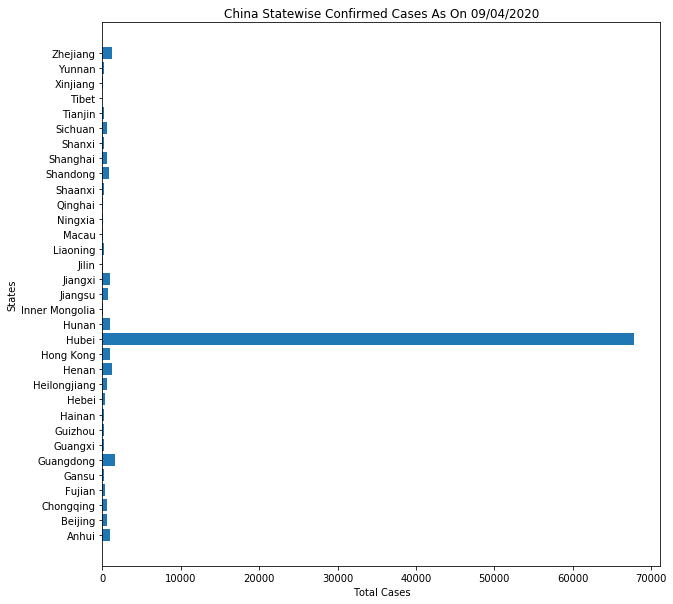

In [22]:
bar_plot('US',latest_us)
bar_plot('China',latest_china)

We Can Clearly Observe From The Horizontal Bar Graph That New York Is The Most Affected State In US In Terms Of Confirmed Case Whereas Hubei Is The Most Affected State In China In Terms Of Confirmed Cases.

Now Let's Look At Daily Count Of Confirmed Cases And Fatalities Of The Whole World

In [23]:
world_confirmed = df.groupby('Date',as_index = False).sum().drop(['Id','Date'],axis = 1)

In [24]:
world_daily = world_confirmed.diff()

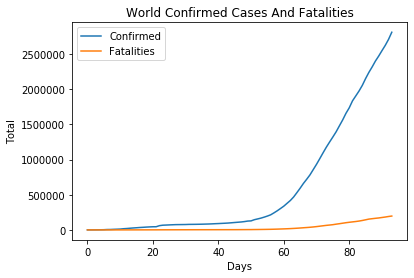

In [25]:
plt.plot(world_confirmed)
plt.title('World Confirmed Cases And Fatalities')
plt.legend(['Confirmed','Fatalities'])
plt.xlabel('Days')
plt.ylabel('Total')
plt.show()


Also Let's Look At Daily New Confirmed Cases And Fatalities Of The Whole World

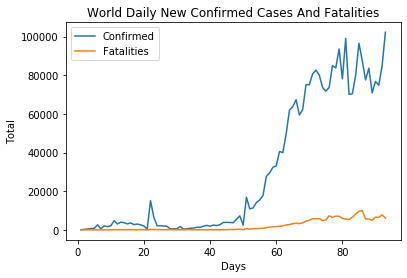

In [26]:
plt.plot(world_daily)
plt.title('World Daily New Confirmed Cases And Fatalities')
plt.legend(['Confirmed','Fatalities'])
plt.xlabel('Days')
plt.ylabel('Total')
plt.show()

Writing Helper Function To Plot Confirmed Cases And Fatalities Statewise And Countrywise

In [27]:
def plot_state_wise(state,df): 
    state_wise_confirmed = df[df['Province_State'] == state]['ConfirmedCases'].values
    state_wise_deaths = df[df['Province_State'] == state]['Fatalities'].values
    plt.plot(state_wise_confirmed)
    plt.plot(state_wise_deaths)
    plt.title(state + ' Confirmed Cases And Fatalities')
    plt.legend(['Confirmed','Fatalities'])
    plt.xlabel('Days')
    plt.ylabel('Total')
    plt.show()

In [28]:
def plot_country_wise(country,df):
    country_wise_confirmed = df[df['Country_Region'] == country]['ConfirmedCases'].values
    country_wise_deaths = df[df['Country_Region'] == country]['Fatalities'].values
    plt.plot(country_wise_confirmed)
    plt.title(country + ' Confirmed Cases And Fatalities')
    plt.plot(country_wise_deaths)
    plt.legend(['Confirmed','Fatalities'])
    plt.xlabel('Days')
    plt.ylabel('Total')
    plt.show()

Plotting Confirmed Cases And Fatalities In India

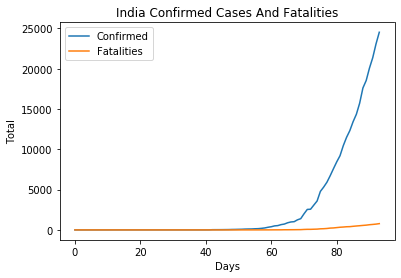

In [29]:
plot_country_wise('India',df)


Plotting Confirmed Cases And Fatalities In Spain

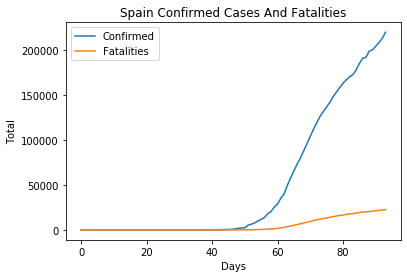

In [30]:

plot_country_wise('Spain',df)


Consolidating Statewise Data To Countrywise Data Of US And China

In [31]:
df_us_consolidated = df_us.groupby('Date').sum()
df_china_consolidated = df_china.groupby('Date').sum()


Plotting Confirmed Cases And Fatalities In US

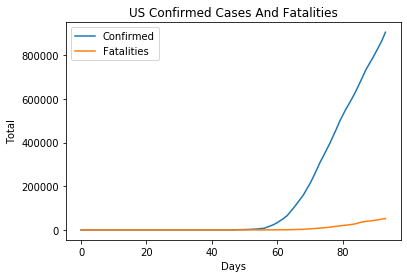

In [32]:
plt.plot(df_us_consolidated['ConfirmedCases'].values)
plt.title('US Confirmed Cases And Fatalities')
plt.plot(df_us_consolidated['Fatalities'].values)
plt.legend(['Confirmed','Fatalities'])
plt.xlabel('Days')
plt.ylabel('Total')
plt.show()


Plotting Confirmed Cases And Fatalities In China

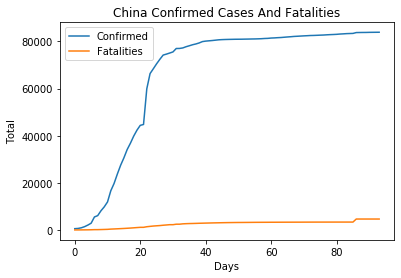

In [33]:
plt.plot(df_china_consolidated['ConfirmedCases'].values)
plt.title('China Confirmed Cases And Fatalities')
plt.plot(df_china_consolidated['Fatalities'].values)
plt.legend(['Confirmed','Fatalities'])
plt.xlabel('Days')
plt.ylabel('Total')
plt.show()


Plotting State Wise Confirmed And Fatalities Of China And US

In [34]:
# Retrieving Names Of Every Affected States
us_states = list(df_us['Province_State'].value_counts().keys())
china_states = list(df_china['Province_State'].value_counts().keys())

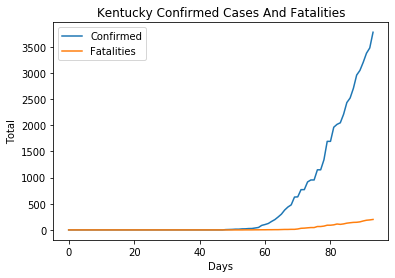

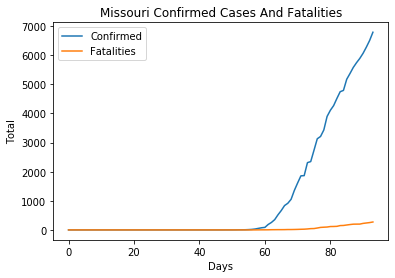

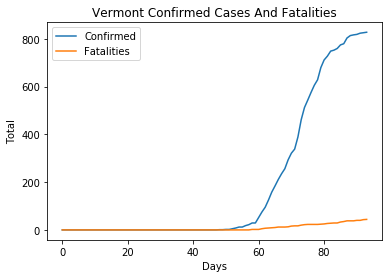

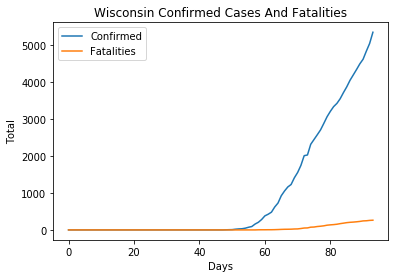

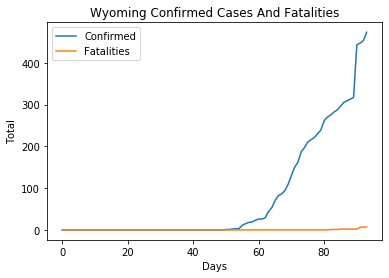

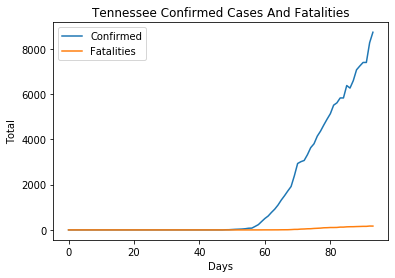

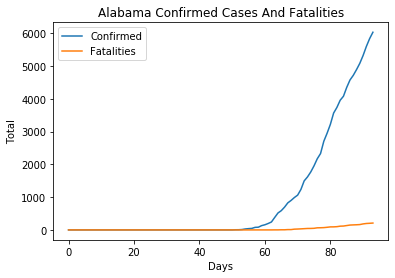

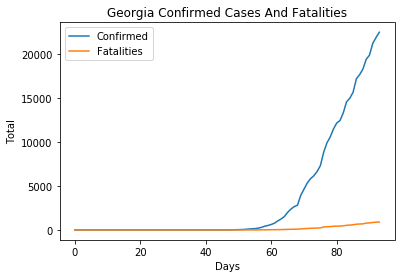

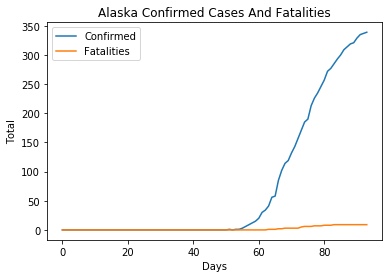

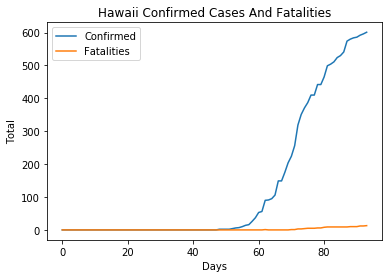

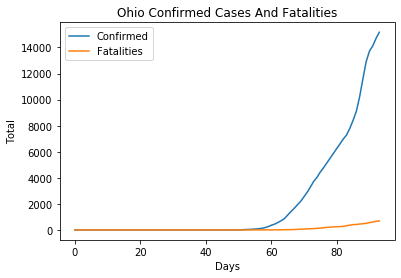

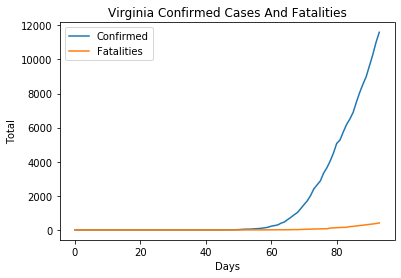

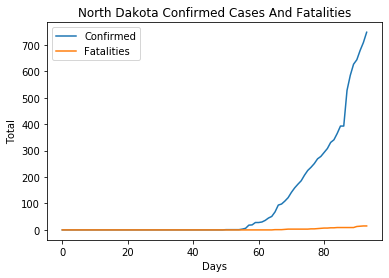

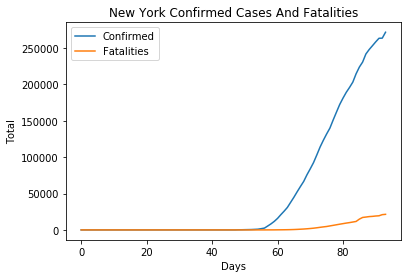

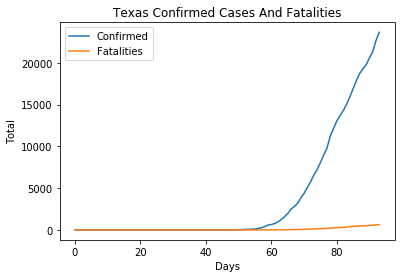

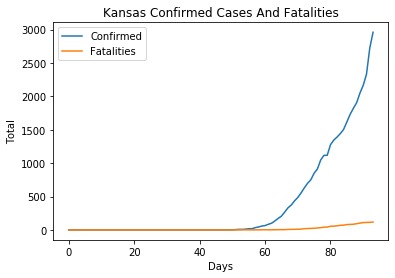

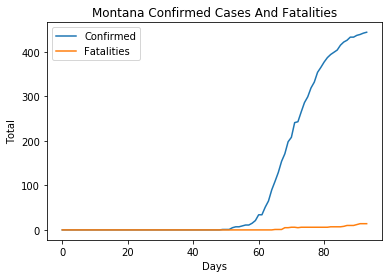

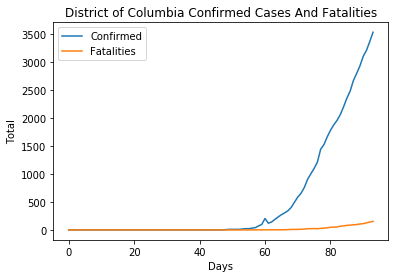

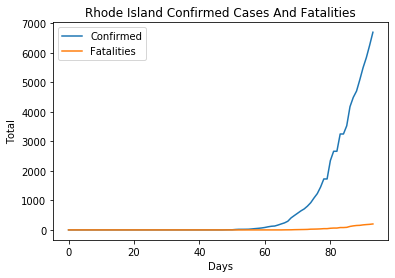

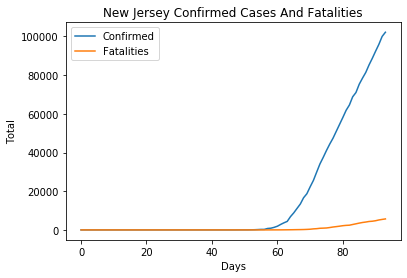

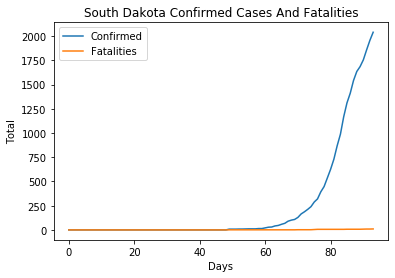

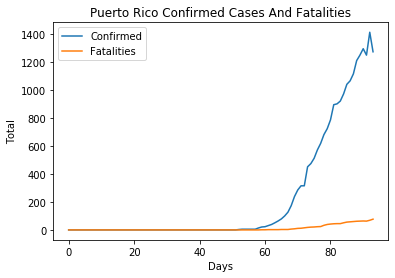

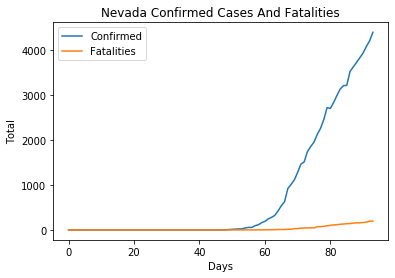

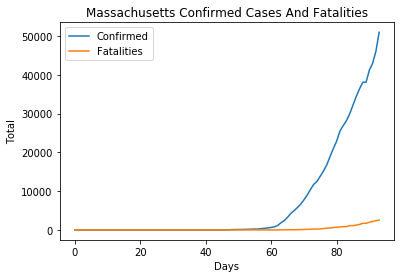

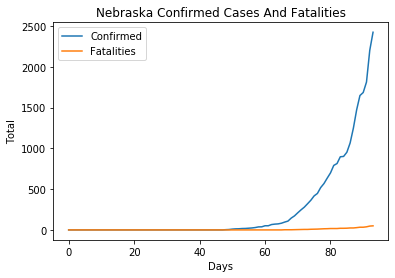

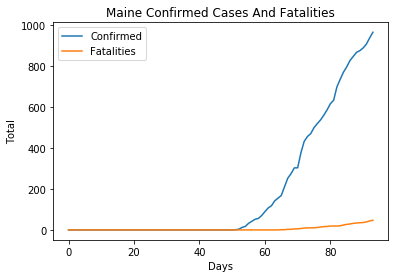

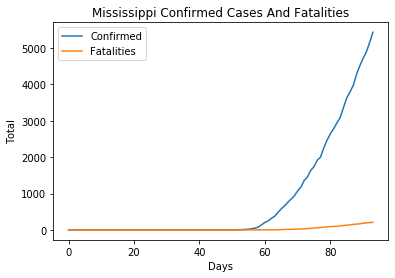

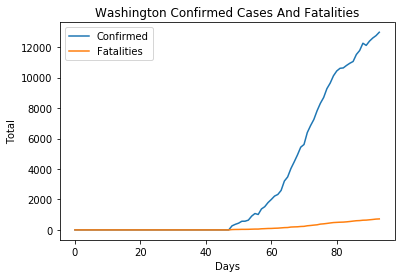

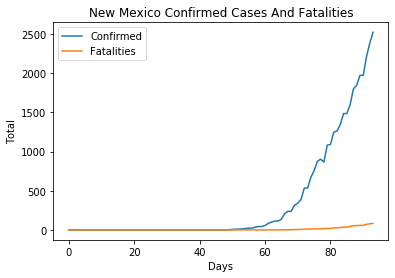

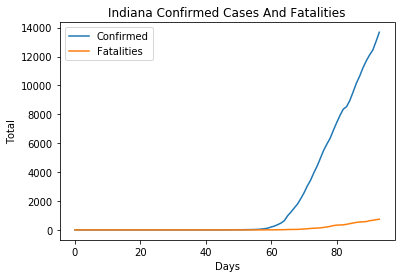

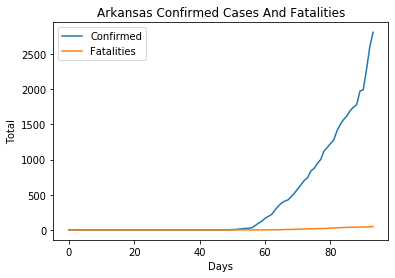

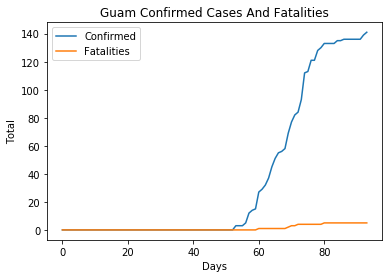

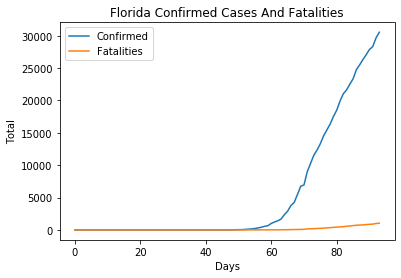

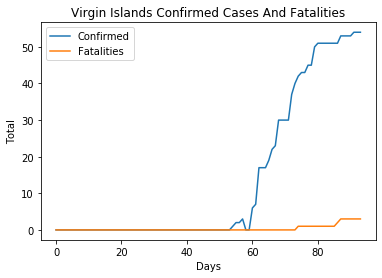

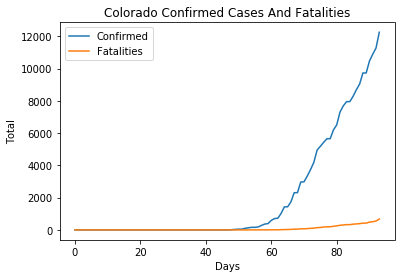

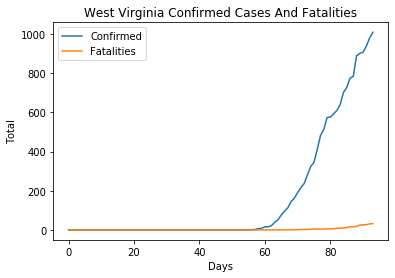

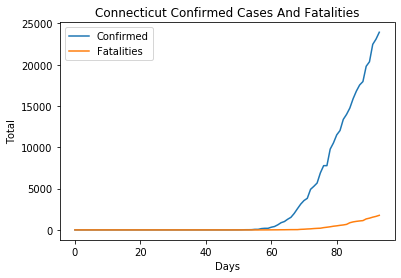

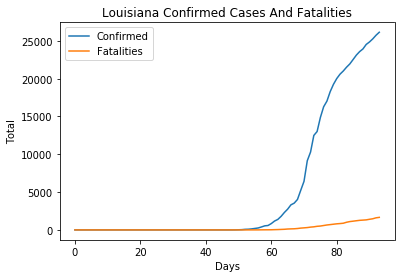

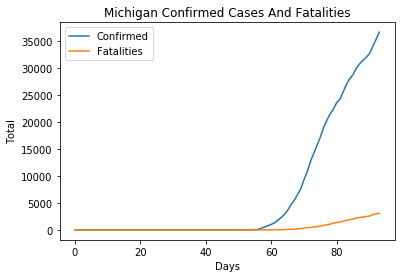

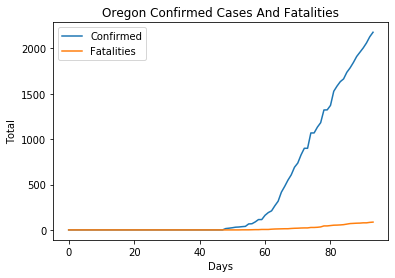

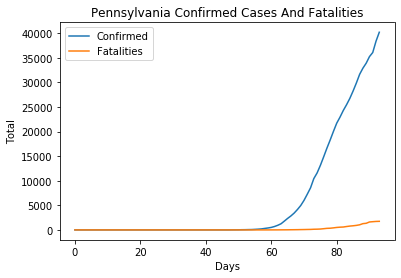

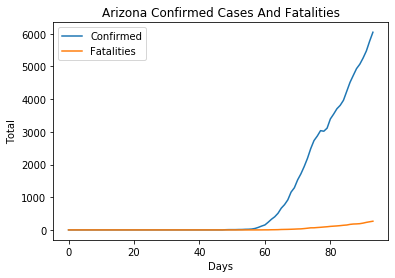

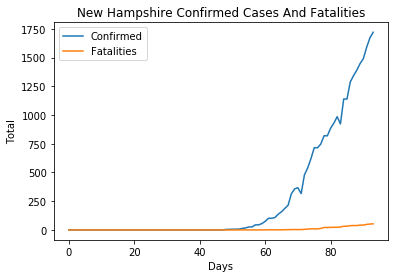

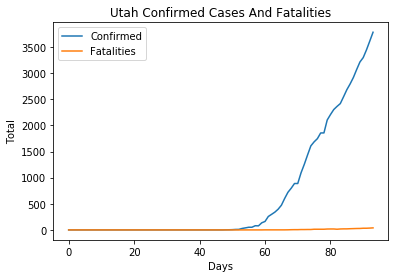

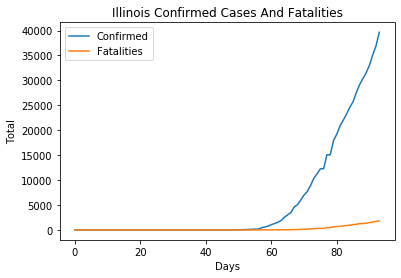

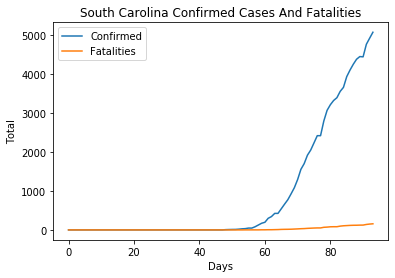

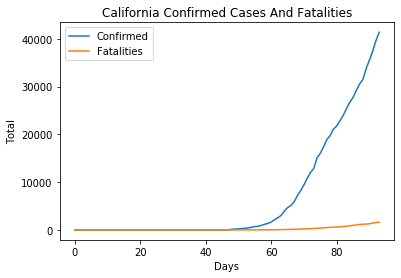

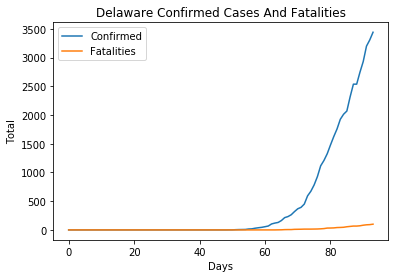

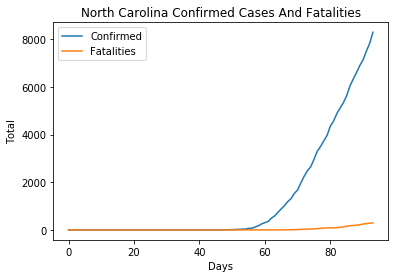

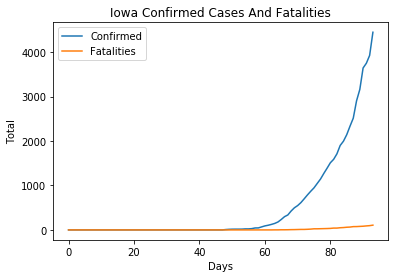

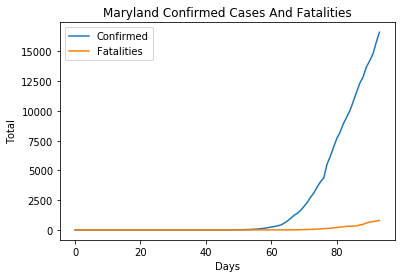

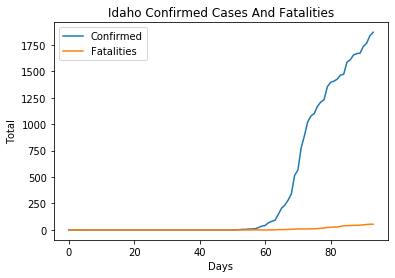

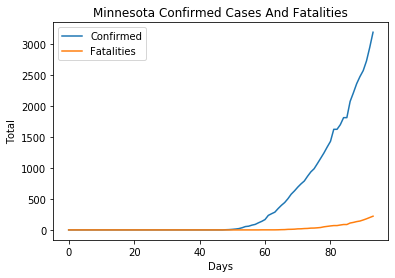

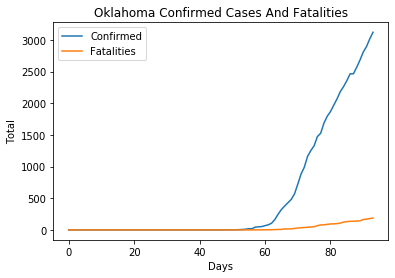

In [35]:
for state in us_states:
    plot_state_wise(state,df)


Now Let's Look At The Daily New Cases In Terms Of Country(India,China,US And Italy)

In [36]:
daily_us = df_us_consolidated.diff()
daily_china = df_china_consolidated.diff()
daily_india = df_india.drop(['Country_Region','Date','Province_State'],axis = 1).diff()
daily_italy = df_italy.drop(['Country_Region','Date','Province_State'],axis = 1).diff()

Helper Function To Plot Daily New Cases

In [37]:
def daily_cases_plot(country,df):
    plt.plot(df['ConfirmedCases'].values)
    plt.title(country + ' Daily Confirmed Cases')
    plt.xlabel('Days')
    plt.ylabel('Total')
    plt.show()

# Now To The Third And Final Question : Which Country Is Able To Control The Spread Of COVID-19 ? #

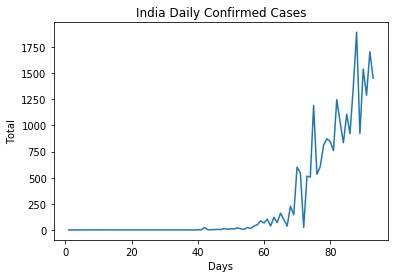

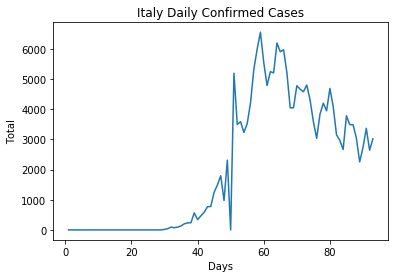

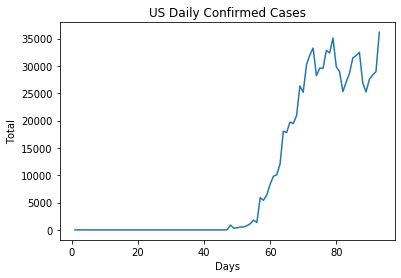

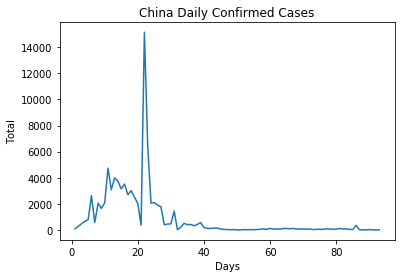

In [38]:
daily_cases_plot('India',daily_india)
daily_cases_plot('Italy',daily_italy)
daily_cases_plot('US',daily_us)
daily_cases_plot('China',daily_china)


If We Look At The Above Plots China Seems To Have Controlled The Spread Of COVID-19 In Its Population.

# 4. Train model and Measure Performance #

Now Let's Train A Model To Predict Fatalities

Importing Neccessary Libraries

In [39]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


Fetching The Dataset, Applying Transformations And Splitting Into Training And Test Dataset

In [40]:
new_df = df.groupby(['Country_Region','Date'],as_index = False)['ConfirmedCases','Fatalities'].sum()

In [41]:
X = pd.get_dummies(data = df[['Country_Region','ConfirmedCases']])
Y = df['Fatalities'].values

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .10, random_state = 40)

Initiating A Linear Regression Model And Fitting It To Our Dataset

In [43]:
model = linear_model.LinearRegression().fit(X_train, Y_train)

Using The Model To Predict On Test Set And Getting The R2 Score

In [44]:
predicted = model.predict(X_test)

In [45]:
r2_score(Y_test, predicted)

0.8363205473778812

# 5. Results #

  1. We find out how various countries relate to each other in terms of reported incidents and deaths and in doing so we have        find that the top 10 countries in terms of suspected cases has about 82% of all confirmed cases in the world and the top        10 countries in terms of deaths has about 93% of all fatalities in the world.
  
  2. Then we looked at how various states and territories equate each other and we found the overwhelming plurality of              infections in the US came from New York and New Jersey showing the significant gaps in attempts to curb the transmission        of virus.
  
  3. Finally, we looked at which nation is somewhere capable of managing the spread of COVID-19, and found out that China has        the potential to regulate it.
  
  
We Also Trained A Fatalities Predictor Which Was Able To Get R2 Score Of 0.83